## IPL Data Analysis

In [41]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt 


pd.set_option('display.max_columns', None)
warnings.simplefilter("ignore")
sns.set_style('darkgrid')

In [42]:
#reading dataset i.e matches.csv
df_matches = pd.read_csv('matches.csv')

In [43]:
#displaying 1st 5 rows 
df_matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [44]:
#Rows and columns
df_matches.shape

(756, 18)

In [45]:
#checking null values 
df_matches.isnull().sum()[df_matches.isnull().sum()>0]

city                 7
winner               4
player_of_match      4
umpire1              2
umpire2              2
umpire3            637
dtype: int64

<AxesSubplot:>

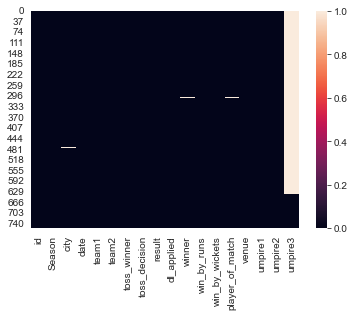

In [46]:
# showing null values by using heat map

sns.heatmap(df_matches.isnull())

In [47]:
df_matches=df_matches.drop(columns={"umpire3"},axis=True)
df_matches=df_matches.drop(columns={"id"},axis=True)

In [48]:
df_matches.city=df_matches.city.fillna("Mumbai")
df_matches.winner=df_matches.winner.fillna("Mumbai Indians")
df_matches.player_of_match=df_matches.player_of_match.fillna("CH Gayle")
df_matches.umpire1=df_matches.umpire1.fillna("HDPK Dharmasena")
df_matches.umpire2=df_matches.umpire2.fillna("C Shamshuddin")

In [49]:
df_matches.corr()

,dl_applied,win_by_runs,win_by_wickets
dl_applied,1.000000,-0.016349,-0.011631
win_by_runs,-0.016349,1.000000,-0.560420
win_by_wickets,-0.011631,-0.560420,1.000000


<AxesSubplot:>

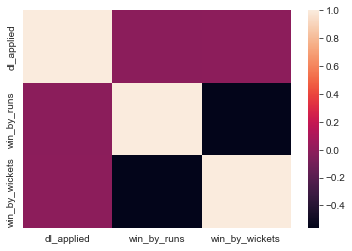

In [50]:
sns.heatmap(df_matches.corr())

In [51]:
#checking unique values in column Season 
df_matches.Season.unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

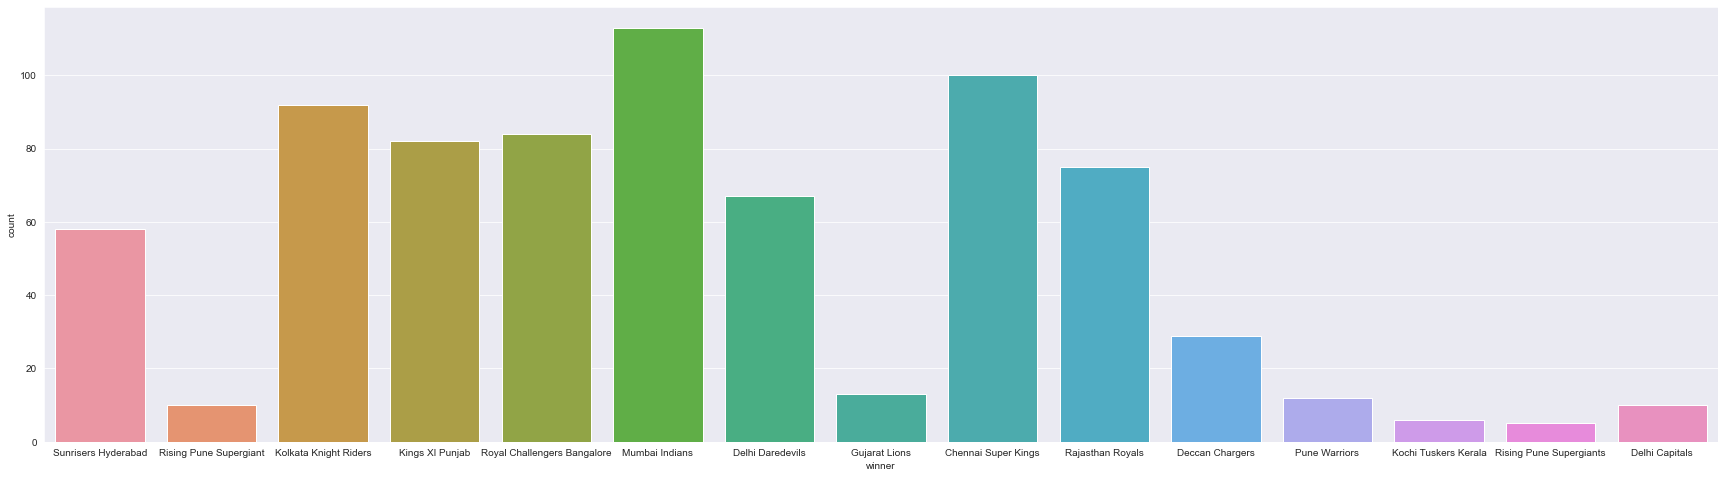

In [52]:

# visualize the target variable
g = sns.countplot(df_matches['winner'])
plt.gcf().set_size_inches(30, 8)
plt.show()
     

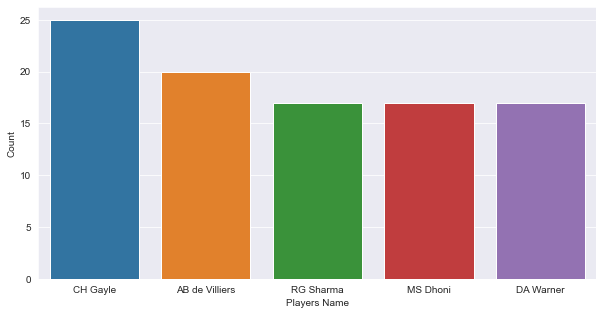

In [53]:
#barplot of top 5 most player_of_match
pom = df_matches.player_of_match.value_counts().nlargest(5)
plt.figure(figsize=(10, 5))
sns.barplot(pom.index, pom)
plt.xlabel('Players Name')
plt.ylabel('Count');

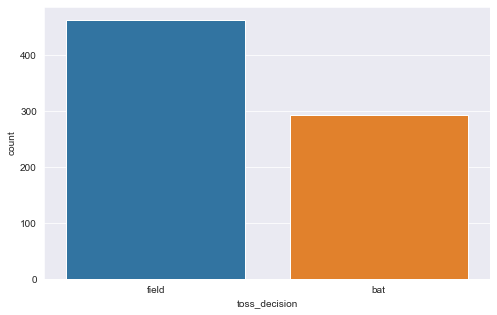

In [54]:
#Count plot of toss_decision
plt.figure(figsize=(8, 5))
sns.countplot(df_matches.toss_decision);

In [55]:
# groupby by winner
df_matches.groupby('winner')['toss_decision'].value_counts()

winner                       toss_decision
Chennai Super Kings          bat              52
                             field            48
Deccan Chargers              field            15
                             bat              14
Delhi Capitals               field             8
                             bat               2
Delhi Daredevils             field            38
                             bat              29
Gujarat Lions                field            11
                             bat               2
Kings XI Punjab              field            61
                             bat              21
Kochi Tuskers Kerala         field             6
Kolkata Knight Riders        field            57
                             bat              35
Mumbai Indians               field            67
                             bat              46
Pune Warriors                bat               9
                             field             3
Rajasthan Royals          

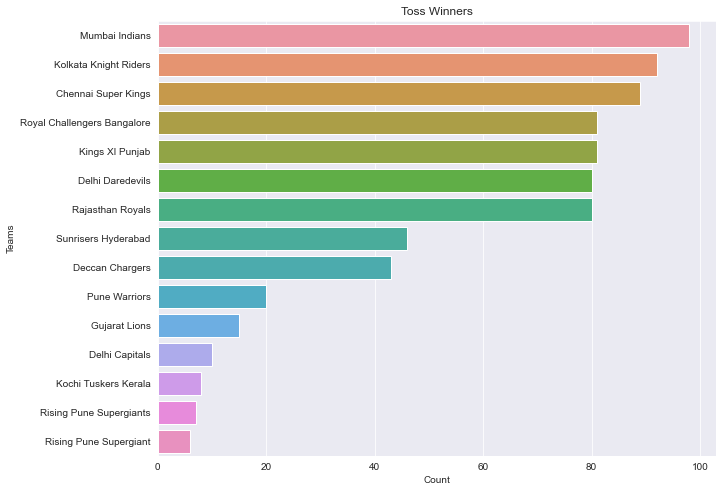

In [56]:
# barplot of most toss winners 
toss_win_label = df_matches.toss_winner.value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(toss_win_label, toss_win_label.index);
plt.ylabel('Teams')
plt.xlabel('Count')
plt.title('Toss Winners');

In [57]:
#teams did fielding first and result was normal 
df_matches[(df_matches['toss_decision'] == 'field') & (df_matches['result'] == 'normal')].head()

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


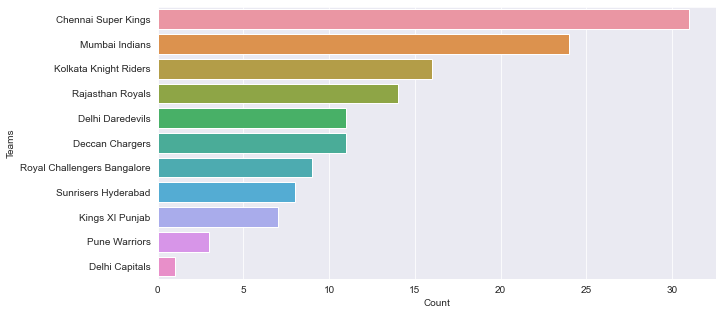

In [58]:
#teams did batting first and won
win = df_matches[(df_matches.toss_decision == 'bat') & (df_matches.win_by_runs != 0)]['winner'].value_counts().sort_values(ascending=False)

'''barplot'''
plt.figure(figsize=(10, 5))
sns.barplot(win, win.index)
plt.xlabel('Count')
plt.ylabel('Teams');

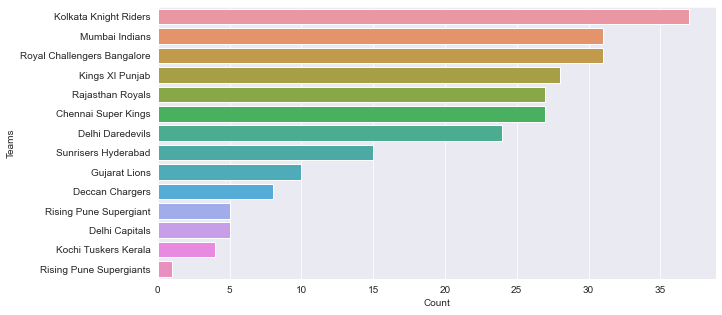

In [59]:
# teams did bowling first and won
win = df_matches[(df_matches.toss_decision == 'field') & (df_matches.win_by_wickets != 0)]['winner'].value_counts().sort_values(ascending=False)

'''barplot'''
plt.figure(figsize=(10, 5))
sns.barplot(win, win.index)
plt.xlabel('Count')
plt.ylabel('Teams');

<AxesSubplot:xlabel='win_by_wickets'>

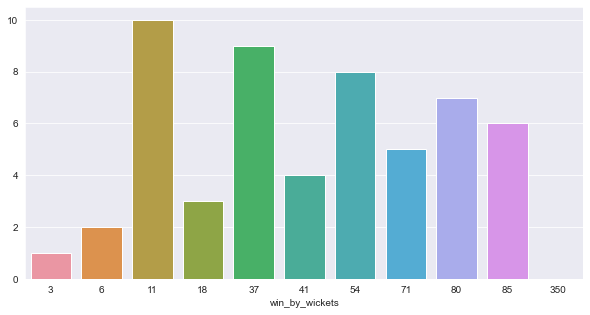

In [60]:
# barplot of won_by_wickets 
plt.figure(figsize=(10, 5))
sns.barplot(df_matches.win_by_wickets.value_counts(), df_matches.win_by_wickets.value_counts().index)

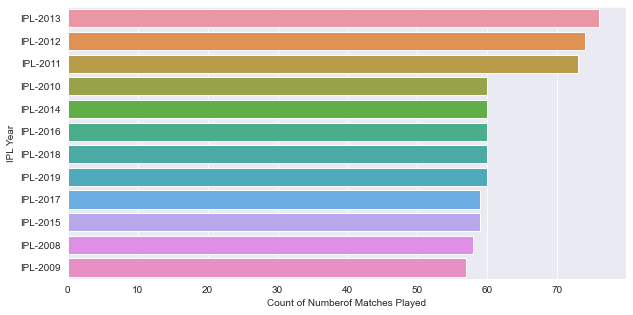

In [61]:
# number of matches played each year 
season = df_matches['Season'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(season, season.index)
plt.ylabel('IPL Year')
plt.xlabel('Count of Numberof Matches Played');

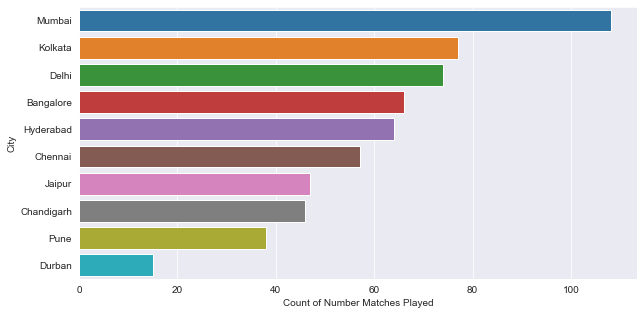

In [62]:
#number of matches played in top 10 city 
city = df_matches['city'].value_counts().sort_values().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(city, city.index)
plt.ylabel('City')
plt.xlabel('Count of Number Matches Played');

In [64]:
#preprocessiong
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [70]:
df_matches.Season=le.fit_transform(df_matches.Season)
df_matches.city=le.fit_transform(df_matches.city)
df_matches.winner=le.fit_transform(df_matches.winner)
df_matches.team1=le.fit_transform(df_matches.team1)
df_matches.team2=le.fit_transform(df_matches.team2)
df_matches.toss_winner=le.fit_transform(df_matches.toss_winner)
df_matches.toss_decision=le.fit_transform(df_matches.toss_decision)
df_matches.result=le.fit_transform(df_matches.result)
df_matches.player_of_match=le.fit_transform(df_matches.player_of_match)
df_matches.venue=le.fit_transform(df_matches.venue)
df_matches.umpire1=le.fit_transform(df_matches.umpire1)
df_matches.umpire2=le.fit_transform(df_matches.umpire2)
df_matches.date = pd.to_datetime(df_matches.date, errors='coerce')

In [71]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Season           756 non-null    int64         
 1   city             756 non-null    int64         
 2   date             756 non-null    datetime64[ns]
 3   team1            756 non-null    int64         
 4   team2            756 non-null    int64         
 5   toss_winner      756 non-null    int64         
 6   toss_decision    756 non-null    int64         
 7   result           756 non-null    int64         
 8   dl_applied       756 non-null    int64         
 9   winner           756 non-null    int64         
 10  win_by_runs      756 non-null    int64         
 11  win_by_wickets   756 non-null    int64         
 12  player_of_match  756 non-null    int64         
 13  venue            756 non-null    int64         
 14  umpire1          756 non-null    int64    

In [72]:
df_matches.corr()


,Season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
Season,1.000000,0.127026,0.230947,0.094766,0.138448,0.280989,0.005336,-0.001116,0.143940,-0.037529,-0.009379,-0.086956,0.001909,0.077548,-0.099272
city,0.127026,1.000000,0.018083,-0.026612,0.035702,-0.038266,0.000459,-0.011002,-0.007491,-0.047636,0.029318,0.017952,0.100146,-0.066715,-0.011641
team1,0.230947,0.018083,1.000000,-0.105600,0.347593,0.122089,0.007869,0.005246,0.394833,-0.014910,0.014638,-0.063502,0.104323,0.011511,-0.048432
team2,0.094766,-0.026612,-0.105600,1.000000,0.545901,0.010807,-0.016249,0.016700,0.514852,0.027585,0.010624,-0.059797,0.075024,-0.036041,0.005671
toss_winner,0.138448,0.035702,0.347593,0.545901,1.000000,0.088610,-0.017580,0.024496,0.486196,-0.028183,0.050468,-0.036081,0.097209,-0.029256,-0.016259
toss_decision,0.280989,-0.038266,0.122089,0.010807,0.088610,1.000000,-0.022020,0.023655,0.072778,0.017356,0.005377,-0.014548,-0.049083,0.054315,-0.025065
result,0.005336,0.000459,0.007869,-0.016249,-0.017580,-0.022020,1.000000,-0.008108,0.019294,-0.028598,-0.049975,0.070167,0.059622,-0.043026,-0.018571
dl_applied,-0.001116,-0.011002,0.005246,0.016700,0.024496,0.023655,-0.008108,1.000000,0.037580,-0.016349,-0.011631,-0.023172,-0.068555,-0.031148,-0.001674
winner,0.143940,-0.007491,0.394833,0.514852,0.486196,0.072778,0.019294,0.037580,1.000000,-0.013671,0.023961,-0.093099,0.100729,-0.028790,-0.008354
win_by_runs,-0.037529,-0.047636,-0.014910,0.027585,-0.028183,0.017356,-0.028598,-0.016349,-0.013671,1.000000,-0.560420,-0.034475,-0.010025,-0.030282,0.055311


<AxesSubplot:>

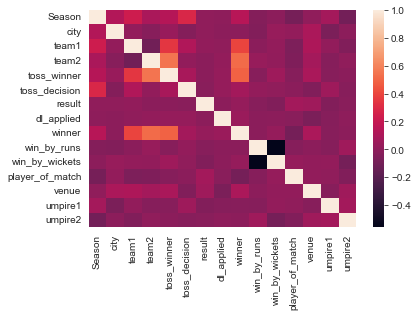

In [73]:
sns.heatmap(df_matches.corr())